# Stock Trades by Members of the US House of Representatives

* **See the main project notebook for instructions to be sure you satisfy the rubric!**
* See Project 03 for information on the dataset.
* A few example prediction questions to pursue are listed below. However, don't limit yourself to them!
    - Can you predict the party affiliation of a representative from their stock trades?
    - Can you predict the geographic region that the representative comes from using their stock trades? E.g., west coast, east coast, south, etc.
    * Can you predict whether a particular trade is a BUY or SELL?

Be careful to justify what information you would know at the "time of prediction" and train your model using only those features.

# Summary of Findings


### Introduction

This project builds on the Project 3 exploration of the 'House Stock Watcher" data set. This uses the same data set along with the additional Party Affiliation data inserted in Project 3. In continuation we now attempt explore a prediction problem involving the same data set. 

We will attempt to form a <b> prediction of the Party Affiliation of a given Individual representative, given their stock trading hitsory.</b>

The above prediction represents a <b>_'Classification Problem'_</b> , where out target variable will be the Party of the representative, as recorded in the <b> party </b> of our dataset. Our evalutation metrics will be the <b>_representative , ticker , type _</b> columns.

The metric we will use to judge the prediction will be _**accuracy**_.

This is because there are no real ethical concerns that would make us want to use measures like precision or return on this data set, it is merely concerned with making a prediction on the party of a representative.
Any False Negative or False Positives predicted by this model would not lead to any life-threatening or ethically concerning isses, therefore it is appropriate to just check for the accuracy of our model.


### Baseline Model
The baseline model of this project contains a total of 4 nominal features: 

* <b>representative</b>
* <b>ticker</b>
* <b>type</b>
* <b>party</b>

We utilized these columns for this project with belief that we can predict <b>party</b> using the values contained in of <b>(Representative</b>, <b>ticker</b>, <b>type)</b> and 

<b>Feature Engineering</b> is as follows:

We omitted null and "Libertarian" for the party columns and concentrate on the two biggest groupings, "Democrat" and "Republican". We converted the <b>party</b> and <b>ticker</b> data into a <b>Binary format</b> using <b>"Binarizer"</b> with "R" set to 1 and "D" set to 0.

Similarly we convert the <b> type </b> column into a binary format as well. This is done because there are 5 types of stock trades, 4 of which were variants of *sale*. As a result we found it prudent to treat all variations as just 'sales'. Lastly, we convert the column into a binary format by setting the "type" column to 1 when it is "purchase" and to 0 otherwise.

Since the representative and ticker columns contain data which are multi-categorical, we changed these columns using "<b>OneHot Encoding</b>," which divides a category feature into a number of binary features, to make sure the numbers are presented correctly for the sake of our exploration. OneHot Encoding will only contain a 1 for one of the onehot encoded columns while the rest will contain a 0 in any given row because we wanted to have all data encoded with binary format without losing any data.

Finally we incorporate all of these 'engineered' features into a <b>Pipeline</b> object:

Inside of the Pipeline, we incorporate our <b>OneHot Encoder</b> and used a <b>RandomForestClassifier</b> as the predicting feature of our model. 

Using this model, our **accuracy scores** are as follows:

* Baseline Training set Accuracy*: **79%**

* Baseline Test set Accuracy*: **80%**

### Final Model

In this section we attmpt to determine whether or not we could increase accuracy score in this Final Model. 

One of the ways through which we can improve our model is <b>adjusting hyperparameters</b> on our <b>RandomForestClassifier</b> class . In our Baseline Model, the hyperparameters we feed into our Random ForestClassfier() were:

* max_depth* = 7
* n_estimators* = 7 

We wanted to see if there was a better combination of these hyperparamters to improve the accuracy of prediciotn model. To achive this, we used <b>GridSearchCV</b>. 

GridSearchCV performs k-fold cross-validation to identify the set of hyperparameters that provides the best validation performance on average from arrays that we created for hyperparameters. 
Upon fitting our training sets on this GridSearchCV() object we use *grids.best_params_* t0 obtain the best combination of hyperparameters:

* max_depth* = 92
* n_estimators* = 44

Using these parameters above allows to obtain a much higher accuracy score from our model:

* Final Training set Accuracy*: **99.8%**

* Final Test set Accuracy*: **99.6%**

These above results imply a satisfactory level of Accuracy for our developed predictive model.


### Fairness Evaluation


To evaluate the Fairness of our model we explore the question of whether the predictions of the model was _**fair**_ , i.e they did not predict one subset of our data better than another.

We explore the fiarness on the **type** column of stock trades that took place. As explained earlier, we Binarized the values in type to only inlcude  0 and 1 , representing *Sale* and *Purchase*.

We then used a permutation test to test for fairness. Our Null and Alternate Hypotheses are as follows:

* <b>Null Hypothesis</b>: This model is fair; the accuracy for the type two subsets are roughly the same

* <b>Alternative Hypothesis</b>: This model is unfair; the accuracy for the purchase subset is higher than the sale subset

We performed <b>Permutation Test</b> 10,000 times with a 95% confidence interval, and the results show that our p value is**0.17**. 

This number exceeds the 0.05 value that a 95% confidence interval suggests. We fail to <b>reject the null hypothesis</b> as a consequence, suggesting that our model is reasonably fair for the **type** column, and does not predict one subgroup of **type** better than another.



# Code

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures






### Baseline Model

In [3]:
## IMPORTING THE DATASET FROM THE WEBSITE:
import requests
url= 'https://house-stock-watcher-data.s3-us-west-2.amazonaws.com/data/all_transactions.json'
json = requests.get(url).json()
df= pd.DataFrame()
for i in json:
    df= df.append(i, ignore_index=True) ##CONVERTING INTO A PANDAS DATAFRAME
    
#CONVERTING THE COLUMNS TO THE CORRECT TYPE
df['disclosure_date'] = pd.to_datetime(df['disclosure_date'],format = '%m/%d/%Y') # CONVERTING FROM STRING TO DATETIME
df['transaction_date'] = pd.to_datetime(df['transaction_date'],format = '%Y-%m-%d',errors = 'coerce') #CONVERTING FROM STRING TO DATETIME
df['disclosure_year'] = df['disclosure_date'].dt.year # CONVERTING FROM STRING TO DATETIME
df['cap_gains_over_200_usd'] = df.cap_gains_over_200_usd.astype(bool) # CONVERTING FROM STRING TO BOOL

df = df.replace('--', np.nan) ## REPLACING '--' STRINGS WITH np.Nan
new = df.copy()

for i in range(len(new['representative'])):
    df['representative'].iloc[i] = " ".join(new['representative'].iloc[i].split(" ")[1:]) ##REMOVING THE TITLE AND RETAINING THE NAME


df.head()

/Users/shreshtv/opt/anaconda3/envs/dsc80/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,disclosure_year,disclosure_date,transaction_date,owner,ticker,asset_description,type,amount,representative,district,ptr_link,cap_gains_over_200_usd
0,2021,2021-10-04,2021-09-27,joint,BP,BP plc,purchase,"$1,001 - $15,000",Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,False
1,2021,2021-10-04,2021-09-13,joint,XOM,Exxon Mobil Corporation,purchase,"$1,001 - $15,000",Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,False
2,2021,2021-10-04,2021-09-10,joint,ILPT,Industrial Logistics Properties Trust - Common...,purchase,"$15,001 - $50,000",Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,False
3,2021,2021-10-04,2021-09-28,joint,PM,Phillip Morris International Inc,purchase,"$15,001 - $50,000",Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,False
4,2021,2021-10-04,2021-09-17,self,BLK,BlackRock Inc,sale_partial,"$1,001 - $15,000",Alan S. Lowenthal,CA47,https://disclosures-clerk.house.gov/public_dis...,False


In [4]:
##IMPORTING DATA ON THE PARTY AFFILIATION OF THE CANDIDATES

import bs4
import lxml

url = "https://www.house.gov/representatives" ##EXTERNAL DATA SOURCE
text = requests.get(url).text
soup = bs4.BeautifulSoup(text)
tds = soup.find_all("td")
data = []
new = []
copy = df.copy()
for td in tds:
    if ("," in td.text) & ("Vacancy" in td.text):
        #print(True,td.text)
        continue
    if ("," in td.text) &("Technology" not in td.text):
        new.append(td.text.strip())
    if len(new) == 2:
        data.append(new)
        new = []
    elif (2<len(td.text) <= 9) & ((td.text[0]=="R")|(td.text[0]=="D")):
        new.append(td.text.strip())
    if len(new) == 2:
        data.append(new)
        new = []
    if len(data) ==438:
        break

##ADDING THE PARTY AFFILIATION COLUMN TO THE DATAFRAME
partydf = pd.DataFrame(data = data,columns = ["name","party"])
partydf["name"] = partydf["name"].str.split(", | ")
for i in range(len(partydf["name"])):
    if len(partydf["name"].iloc[i]) == 3:
        temp = []
        for j in range(3):
            temp.append(len(partydf["name"].iloc[i][j]))
        del partydf["name"].iloc[i][temp.index(min(temp))]
representative = df.representative.unique().tolist()
for i in range(len(partydf["name"])):    
    for realname in representative:
        if len(partydf["name"].iloc[i]) == 1:
            if (partydf["name"].iloc[i][0] in realname):
                partydf["name"].iloc[i] = realname
        if len(partydf["name"].iloc[i]) == 2:
            if (partydf["name"].iloc[i][0] in realname) & (partydf["name"].iloc[i][1] in realname):
                partydf["name"].iloc[i] = realname
        
    if type(partydf["name"].iloc[i])==list:
        partydf["name"].iloc[i] = np.nan
        partydf["party"].iloc[i] = np.nan
finaldf = pd.merge(copy,partydf,left_on = "representative", right_on = "name",how = "left")
no_party = finaldf[finaldf.representative != finaldf.name].representative.unique().tolist()

noparty_party = ["D","R","D","D","D","R","R","R","R","R","D","R","D","R","R","D","R","D","No","R","R","No"
,"No","D","R","D","D","D","R","R","D","R","D","R","D","R","R",'R',"D","R","No","No","Libertarian"]
nopartydf = pd.DataFrame()
nopartydf["name"] = no_party
nopartydf["party"] = noparty_party

partydf = partydf.dropna().reset_index(drop=True)
all_party = pd.concat([partydf,nopartydf]).set_index("name")
partydf = pd.merge(copy,all_party,left_on = "representative", right_index = True,how = "left")

partydf.head()


,disclosure_year,disclosure_date,transaction_date,owner,ticker,asset_description,type,amount,representative,district,ptr_link,cap_gains_over_200_usd,party
0,2021,2021-10-04,2021-09-27,joint,BP,BP plc,purchase,"$1,001 - $15,000",Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,False,R
1,2021,2021-10-04,2021-09-13,joint,XOM,Exxon Mobil Corporation,purchase,"$1,001 - $15,000",Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,False,R
2,2021,2021-10-04,2021-09-10,joint,ILPT,Industrial Logistics Properties Trust - Common...,purchase,"$15,001 - $50,000",Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,False,R
3,2021,2021-10-04,2021-09-28,joint,PM,Phillip Morris International Inc,purchase,"$15,001 - $50,000",Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,False,R
4,2021,2021-10-04,2021-09-17,self,BLK,BlackRock Inc,sale_partial,"$1,001 - $15,000",Alan S. Lowenthal,CA47,https://disclosures-clerk.house.gov/public_dis...,False,D


Having reproduced a complete data set that includes the Party Affiliation of the listed Representatives. We can begin the prediction portion of this exploration


Let us filter the above dataframe to only the columns that will aid us in this prediction:
i.e. our evaluatation and target metrics: <b> representative , ticker , type </b> and <b> party </b> respectively 

In [323]:
working_df = partydf[['representative','ticker','type', 'party']]
working_df['party'].value_counts()

D              8955
R              6898
No               73
Libertarian       3
Name: party, dtype: int64

For the purposes of this exploration we are going to ignore the Liberatarian Party as there are only 3 representatives. Removing them will allow us to treat **party** as a binary variable and thus let us train a **_binary classifier model_**.

In [326]:
working_df = working_df[(working_df['party'] != 'Libertarian') & (working_df['party'] != 'No')]
working_df = working_df.dropna()
working_df['party'].value_counts()

D    8140
R    6381
Name: party, dtype: int64

Meanwhile, for the party column, since there are only 2 main values 'R' and 'D', we chose to convert the values into a Binary format. Where we convert **_'R'_** to 1 and **_'D'_** to 0

In [327]:
working_df['party'] = (working_df['party'] == 'R').astype(float)
working_df

,representative,ticker,type,party
0,Virginia Foxx,BP,purchase,1.0
1,Virginia Foxx,XOM,purchase,1.0
2,Virginia Foxx,ILPT,purchase,1.0
3,Virginia Foxx,PM,purchase,1.0
4,Alan S. Lowenthal,BLK,sale_partial,0.0
...,...,...,...,...
15924,Ed Perlmutter,SWK,sale_partial,0.0
15925,Ed Perlmutter,USB,sale_partial,0.0
15926,Nicholas Van Taylor,BMY,sale_full,1.0
15927,Nicholas Van Taylor,LLY,sale_full,1.0


Similarly for the **type** columns we see that there are 5 different types:

In [328]:
working_df['type'].value_counts()

purchase        7569
sale_full       4543
sale_partial    2302
exchange         106
sale               1
Name: type, dtype: int64

Since it is difficult to interpret **type**  of trade as having an order of presidence, it does not make sense to treat it as an **ordnial varaible**.

It would make more sense to treat *type* as more like a **binary variable** , because 4 out of our 5 types are just variations of *sale*. 
Thus will convert all the various types of sales (full,partial,exchange) into a general term: **sale** and leave the purchase rows as is. Therefore our *engineered **type** feature* would indicate a value of **1** if it was a **purchase** trade and a value of **0** if it were any of the 4 **sale** trades.

We perform is transformation in a manner similar to our binary conversion of the **party** column:

In [329]:
working_df['type'] = (working_df['type'] == 'purchase').astype(float)
working_df

,representative,ticker,type,party
0,Virginia Foxx,BP,1.0,1.0
1,Virginia Foxx,XOM,1.0,1.0
2,Virginia Foxx,ILPT,1.0,1.0
3,Virginia Foxx,PM,1.0,1.0
4,Alan S. Lowenthal,BLK,0.0,0.0
...,...,...,...,...
15924,Ed Perlmutter,SWK,0.0,0.0
15925,Ed Perlmutter,USB,0.0,0.0
15926,Nicholas Van Taylor,BMY,0.0,1.0
15927,Nicholas Van Taylor,LLY,0.0,1.0


Given the above data frame, we need to perform some more <b>_'feature engineering'_</b> on the **representative , ticker**  columns to ensure that the values are are appropriately formatted for the purposes of our exploration. 

We will use a **OneHot Encoding** to transorm these columns as they represent multi-categorical data.

Let us create a pipeline that incorporates the feature the engineering and returns a classification model. 


In [300]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

First we create 'Training' - 'Test' split to train and test our model. And we include only the predictive columns in our X variable

In [330]:
categ_df = working_df[['representative','ticker', 'type']]

In [331]:
X = categ_df
y = working_df['party']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [332]:
X_train = X_train.dropna()
y_train = y_train.dropna()

Given the fact that 'Representative' and 'Ticker' represent nominal data, it is helpful to OneHotEncode these values for proper prediction.

We then incorporate our One_Hot_Encoder into a Pipeline, where we use a **_RandomForectClassifier()_** as our predicting model.


In [333]:
pl = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown = 'ignore')), 
    ('forest', RandomForestClassifier(max_depth = 7, n_estimators = 7))
])

In [334]:
pl.fit(X_train, y_train)


Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore')),
                ('forest',
                 RandomForestClassifier(max_depth=7, n_estimators=7))])

Having fit our training sets, let us calculate the accuracy on both our training and test sets to see how well out model performs

In [335]:
pl.score(X_train, y_train)

0.7958677685950413

As seen above this model returns an Accuracy Score of **79%** on our training sets.

Let us see how it performs on our test sets below:

In [336]:
pl.score(X_test,y_test)

0.8094188928669788

As seen above it gives us even better result of **80%** on our test sets. Let us see if there are ways we can improve this accuracy score

### Final Model

One way we can improve the accuracy model, is to improve the Hyperparameters we feed into our *Random ForestClassfier()*

In our Pipeline above, we have arbitrarily chose 10 for both parameters, but we can still find a more optimal combination to maximise accurancy .

 2 such parameters for  _RandomForectClassifier()_  are:
 * max-depth 
 * n_estimators 
 
We can use **GridSearch** to determine the best combination of parameters for our Pipeline model

In [309]:
hyperparameters = {
    'forest__max_depth': np.arange(2, 100, 10),
    'forest__n_estimators': np.arange(10,50,2)
}

hyperparameters

{'forest__max_depth': array([ 2, 12, 22, 32, 42, 52, 62, 72, 82, 92]),
 'forest__n_estimators': array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42,
        44, 46, 48])}

In [310]:
from sklearn.model_selection import GridSearchCV

In [313]:
grids = GridSearchCV(pl, param_grid=hyperparameters, return_train_score=True)

grids.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('onehot',
                                        OneHotEncoder(handle_unknown='ignore')),
                                       ('forest',
                                        RandomForestClassifier(max_depth=7,
                                                               n_estimators=7))]),
             param_grid={'forest__max_depth': array([ 2, 12, 22, 32, 42, 52, 62, 72, 82, 92]),
                         'forest__n_estimators': array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42,
       44, 46, 48])},
             return_train_score=True)

Having fit our training and groups into the grid object, we can see what out best combination of parameters are below:

In [314]:
grids.best_params_

{'forest__max_depth': 92, 'forest__n_estimators': 44}

Having found the ideal combination, we test the accuracy on our training and test sets with new hyper-parameters to see if our accuracy has improved:

In [318]:
grids.score(X_train, y_train)

0.9986225895316805

We then run the bottom cell to calculate the accuracy on our test models

In [320]:
grids.score(X_test,y_test)

0.9961443128614706

This has shown a significant improvement in our accuracy for both the training and test sets.
As a comparison our accuracy on the *Baseline Model* was = 74% and 75% on our training and testing models respectively.

### Fairness Evaluation

Having developed a model with satisfactory accuracy we must now determine how fair our model is on the *type* subset of stock trades that took place

I.e, We want to explore whether this model is fair for *'Purchase'* trades and *'Sale'* trades.


In [337]:
working_df

,representative,ticker,type,party
0,Virginia Foxx,BP,1.0,1.0
1,Virginia Foxx,XOM,1.0,1.0
2,Virginia Foxx,ILPT,1.0,1.0
3,Virginia Foxx,PM,1.0,1.0
4,Alan S. Lowenthal,BLK,0.0,0.0
...,...,...,...,...
15924,Ed Perlmutter,SWK,0.0,0.0
15925,Ed Perlmutter,USB,0.0,0.0
15926,Nicholas Van Taylor,BMY,0.0,1.0
15927,Nicholas Van Taylor,LLY,0.0,1.0


We will use **accuracy** as our *parity measure* for the simple reason that there are no real ethical concerns that would make us want to use measures like *precision* or *return* on this data set, it is merely concerned with making a prediction on the party of a representative. 

Any False Negative or False Positives predicted by this model would not lead to any life-threatening or ethically concerning isses, therefore it is appropriate to just check for the accuracy of our model. 

We will use a Permutation test to test for fairness of our model by shuffling our **type** column to check for whether the predcited accuracy is fair or not.

Our Null and Alternate Hyptheses are as follows:

- **Null Hypothesis**: This model is fair; the accuracy for the *type* two subsets are roughly the same

- **Alternative Hypothesis**: This model is unfair; the accuracy  for the *purchase* subset is higher than the *sale* subset



Our observed test statistic for such a permuatation test would be our **final accuracy** on our testing set:
i.e **0.9961** or roughly **99%** 

Our permutation test will be as follows:

In [357]:
purch_prop = (working_df['type'].value_counts()/ len(working_df['type']))[1]
sale_prop = (working_df['type'].value_counts()/ len(working_df['type']))[0]

0.17

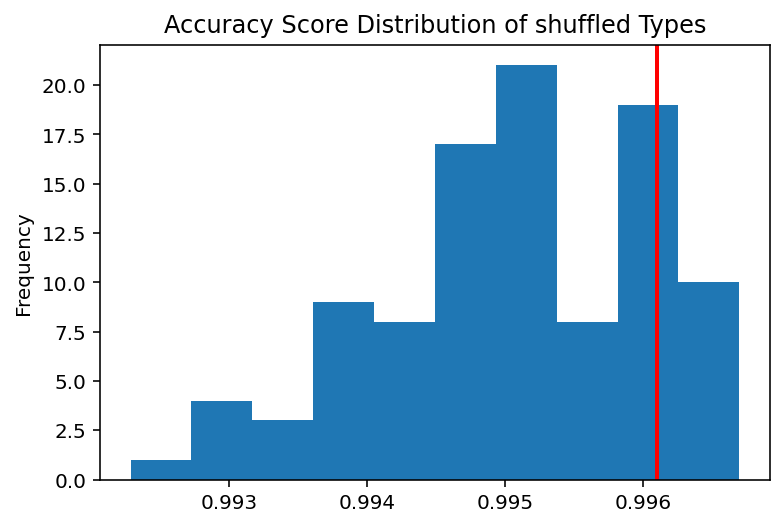

In [360]:
observed_acc = 0.9961

temp_working = working_df
perm_test = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown = 'ignore')), 
    ('forest', RandomForestClassifier(max_depth = 92, n_estimators = 44))])

results = []
for _ in range(10000):
    shuffled_types = np.random.choice([0,1],p = [purch_prop,sale_prop],size =len(working_df['type']))
    temp_working['type'] = shuffled_types
    temp_categ_df = temp_working[['representative','ticker', 'type']]

    ## NEW X-y SPLIT WITH THE SHUFFLED TYPES
    X = temp_categ_df
    y = temp_working['party']
    new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(X, y, random_state = 1)
    
    perm_test.fit(new_X_train, new_y_train)
    results.append(perm_test.score(new_X_test,new_y_test))
    

pd.Series(results).plot(kind = "hist",title = "Accuracy Score Distribution of shuffled Types")
plt.axvline(x=observed_acc,color = "red", linewidth = 2)
pval = (np.array(results)>=observed_acc).mean()
pval # higher than 0.05 so do not reject the null

We can see our p_value is = 0.17. 

This is greater than the 0.05 value indicated by a 95% confidence interval. As a result we
**Fail to Reject the Null Hypothesis**, implying that our model can be considered fair.